In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sb
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.Session(config=config)

In [2]:
from core.utils.preprocessing import df_to_xy
from core.models.metrics import MAX_GAIN
#fix rnd seed
np.random.seed(7)

# Read and sanitize the data
# df = pd.read_excel("../data/UG_HH_NEW_continuous_no200.xls")

# Read and sanitize the data
df = pd.read_csv("../data/t00/data_t00.csv")
df_full = df.copy()
drop_cols = ["worker_id", "resp_worker_id", "prop_worker_id", "updated", "status", "job_id", "status", "timestamp", "rowid", "offer_dss", "offer", "offer_final"]
df = df[[col for col in df.columns if col not in drop_cols]]
df = df.dropna()


x, y = df_to_xy(df, fuse_risk=False, centered=True)
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 2/5, random_state = 0)

**Loss function**

In [3]:
@np.vectorize
def sigmoid1024(x):
    base = 1024.0**2
    return (base**x/(base**x + 1))

@np.vectorize
def loss(x):
    offset = 1
    x1 = (x + offset) / 8.0
    x2 = (x) / 20.0
    return (1 - sigmoid1024(x1) *  np.cos(x2/np.pi))

def gain(x):
    return 1 - loss(x)

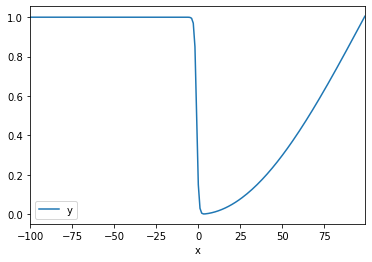

In [4]:
x = np.arange(-100, 100, 1)
y = loss(x)

out_df = pd.DataFrame({'x':x, 'y':y})
out_df.plot.line(x='x', y='y')

In [5]:
from core.utils.data_augmentation import DACombine

In [6]:
from core.models.deep import keras_hiddenless_model, keras_model, loss_tf, gain_tf, KerasModel
from keras import backend as K

Using TensorFlow backend.


**Metrics**

In [7]:
from core.models.metrics import gain_mean, avg_gain_ratio

**Model: No data Augmentation**

In [8]:
# model = KerasModel(loss=loss_tf, metrics=[gain_tf], batch_size=256, epochs=1000)
# da = DACombine()
# xTrain_a, yTrain_a = xTrain.astype(K.floatx()), yTrain.astype(K.floatx())
# split = int(xTrain.shape[1] * 0.75)
# #xTrain_a, yTrain_a = xTrain[:split], yTrain[:split]
# xVal, yVal = xTrain[split:], yTrain[split:]
# #xTrain_a, yTrain_a = da.fit_predict(xTrain, yTrain, size=1024, distance=10)
# history = model.fit(xTrain_a.astype(K.floatx()), yTrain_a.astype(K.floatx()),  validation_split=0.25, verbose=0)

# #print(history.history)

# loss_hist = pd.DataFrame(data={'loss': history.history['loss'], 'val_loss': history.history['val_loss']})
# loss_hist.plot()

# acc_hist = pd.DataFrame(data={'acc': history.history['gain_tf'], 'val_acc': history.history['val_gain_tf']})
# acc_hist.plot()

# yPred = model.predict(xTest, batch_size=128)

# out_data = pd.DataFrame(data={'y_test': np.ravel(yTest), 'y_pred': np.ravel(yPred)})
# #stl = model.score(xTest, yTest, verbose=0)

In [9]:
# yPred = model.predict(xTest)

# out_data = pd.DataFrame(data={'y_test': np.ravel(yTest), 'y_pred': np.ravel(yPred)})
# out_data.plot()

# yPred = model.predict(xTest)
# print("gain_mean: ", gain_mean(yTest.ravel(), yPred.ravel()))
# print("gain_ratio: ", avg_gain_ratio(yTest.ravel(), yPred.ravel()))

**Model with data augmentation**

In [10]:
# #sci-kit like training
# model = KerasModel(loss=loss_tf, metrics=[gain_tf], batch_size=30, epochs=200)
# da = DACombine()
# xTrain_a, yTrain_a = xTrain, yTrain
# split = int(xTrain.shape[1] * 0.75)
# xTrain_a, yTrain_a = xTrain[:split], yTrain[:split]
# xVal, yVal = xTrain[split:], yTrain[split:]
# xTrain_a, yTrain_a = da.fit_predict(xTrain_a, yTrain_a, size=xTrain_a.shape[1]*16, distance=10, retarget=True, distribution=True, combine=True)
# history = model.fit(xTrain_a.astype('float'), yTrain_a.astype('float'),  validation_data=(xVal, yVal), verbose=0)
# loss_hist = pd.DataFrame(data={'loss': history.history['loss'], 'val_loss': history.history['val_loss']})
# loss_hist.plot()

# acc_hist = pd.DataFrame(data={'acc': history.history['gain_tf'], 'val_acc': history.history['val_gain_tf']})
# acc_hist.plot()

# yPred = model.predict(xTest, batch_size=128)

# out_data = pd.DataFrame(data={'y_test': np.ravel(yTest), 'y_pred': np.ravel(yPred)})
# #stl = model.score(xTest, yTest, verbose=0)

In [11]:
# yPred = model.predict(xTest)

# out_data = pd.DataFrame(data={'y_test': np.ravel(yTest), 'y_pred': np.ravel(yPred)})
# out_data.plot()

# yPred = model.predict(xTest)
# print("gain_mean: ", gain_mean(yTest.ravel(), yPred.ravel()))
# print("gain_ratio: ", avg_gain_ratio(yTest.ravel(), yPred.ravel()))

** Model using _mse_ loss and data augmentation**

In [12]:
# #sci-kit like training
# model = KerasModel(loss='mse', metrics=[gain_tf], batch_size=60, epochs=200)
# da = DACombine()
# split = int(xTrain.shape[1] * 0.75)
# xTrain_a, yTrain_a = xTrain[:split], yTrain[:split]
# xVal, yVal = xTrain[split:], yTrain[split:]
# #xTrain_a, yTrain_a = da.fit_predict(xTrain_a, yTrain_a, size=xTrain_a.shape[1]*16, distance=10, retarget=True, distribution=True, combine=True)
# history = model.fit(xTrain_a.astype('float'), yTrain_a.astype('float'), validation_data=(xVal, yVal))
# loss_hist = pd.DataFrame(data={'loss': history.history['loss'], 'val_loss': history.history['val_loss']})
# loss_hist.plot()

# acc_hist = pd.DataFrame(data={'acc': history.history['gain_tf'], 'val_acc': history.history['val_gain_tf']})
# acc_hist.plot()

# yPred = model.predict(xTest, batch_size=128)

# out_data = pd.DataFrame(data={'y_test': np.ravel(yTest), 'y_pred': np.ravel(yPred)})
# #stl = model.score(xTest, yTest, verbose=0)

In [13]:
# yPred = model.predict(xTest)

# out_data = pd.DataFrame(data={'y_test': np.ravel(yTest), 'y_pred': np.ravel(yPred)})
# out_data.plot()

# yPred = model.predict(xTest)
# print("gain_mean: ", gain_mean(yTest.ravel(), yPred.ravel()))
# print("gain_ratio: ", avg_gain_ratio(yTest.ravel(), yPred.ravel()))

In [10]:
from core.utils.data_augmentation import DASampling, DACombine

da = DACombine()
split = int(xTrain.shape[0] * 0.75)
xTrain_a, yTrain_a = xTrain[:split], yTrain[:split]
xVal, yVal = xTrain[split:], yTrain[split:]
#da2 = D
das = DASampling()
das
xTrain_a, yTrain_a = da.fit_predict(xTrain_a, yTrain_a, size=xTrain_a.shape[0]*64, distance=5, retarget=True, distribution=True, combine=True)
print(np.unique(yTrain_a))
xTrain_a, yTrain_a = das.generate_data(xTrain_a, yTrain_a, size=10000)

[  0  10  25  30  35  40  45  50  55 100]


In [32]:
from keras import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras import optimizers
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = xTrain.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
# NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
# NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss=loss_tf, optimizer=optimizers.Adam(lr=0.001), metrics=['acc'])
NN_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_12 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 257       
Total params: 41,601
Trainable params: 41,601
Non-trainable params: 0
_________________________________________________________________


In [33]:

# NN_model.fit(xTrain_a, to_categorical(yTrain_a, 201), epochs=200, shuffle=True, validation_split=0.2, batch_size=1024)
# NN_model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=0.00001), metrics=['acc'])
NN_model.fit(xTrain, yTrain, epochs=2048, validation_data=(xVal, yVal), shuffle=True, batch_size=128)

Train on 60 samples, validate on 15 samples
Epoch 1/2048
60/60 [==============================] - 0s 5ms/step - loss: 0.9863 - acc: 0.0167 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 2/2048
60/60 [==============================] - 0s 114us/step - loss: 0.9859 - acc: 0.0167 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 3/2048
60/60 [==============================] - 0s 101us/step - loss: 0.9856 - acc: 0.0167 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 4/2048
60/60 [==============================] - 0s 129us/step - loss: 0.9852 - acc: 0.0167 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 5/2048
60/60 [==============================] - 0s 117us/step - loss: 0.9849 - acc: 0.0167 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 6/2048
60/60 [==============================] - 0s 95us/step - loss: 0.9846 - acc: 0.0167 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 7/2048
60/60 [==============================] - 0s 123us/step - loss: 0.9842 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 

Epoch 59/2048
60/60 [==============================] - 0s 138us/step - loss: 0.9180 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 60/2048
60/60 [==============================] - 0s 97us/step - loss: 0.9180 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 61/2048
60/60 [==============================] - 0s 130us/step - loss: 0.9180 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 62/2048
60/60 [==============================] - 0s 134us/step - loss: 0.9180 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 63/2048
60/60 [==============================] - 0s 152us/step - loss: 0.9180 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 64/2048
60/60 [==============================] - 0s 123us/step - loss: 0.9180 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 65/2048
60/60 [==============================] - 0s 109us/step - loss: 0.9180 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00


Epoch 117/2048
60/60 [==============================] - 0s 111us/step - loss: 0.9173 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 118/2048
60/60 [==============================] - 0s 136us/step - loss: 0.9173 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 119/2048
60/60 [==============================] - 0s 125us/step - loss: 0.9173 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 120/2048
60/60 [==============================] - 0s 148us/step - loss: 0.9173 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 121/2048
60/60 [==============================] - 0s 138us/step - loss: 0.9173 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 122/2048
60/60 [==============================] - 0s 90us/step - loss: 0.9173 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 123/2048
60/60 [==============================] - 0s 108us/step - loss: 0.9173 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.00

Epoch 174/2048
60/60 [==============================] - 0s 94us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 175/2048
60/60 [==============================] - 0s 79us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 176/2048
60/60 [==============================] - 0s 105us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 177/2048
60/60 [==============================] - 0s 121us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 178/2048
60/60 [==============================] - 0s 113us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 179/2048
60/60 [==============================] - 0s 126us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 180/2048
60/60 [==============================] - 0s 101us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.000

Epoch 231/2048
60/60 [==============================] - 0s 131us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 232/2048
60/60 [==============================] - 0s 114us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 233/2048
60/60 [==============================] - 0s 92us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 234/2048
60/60 [==============================] - 0s 113us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 235/2048
60/60 [==============================] - 0s 163us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 236/2048
60/60 [==============================] - 0s 95us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 237/2048
60/60 [==============================] - 0s 115us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.000

Epoch 288/2048
60/60 [==============================] - 0s 103us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 289/2048
60/60 [==============================] - 0s 126us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 290/2048
60/60 [==============================] - 0s 79us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 291/2048
60/60 [==============================] - 0s 93us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 292/2048
60/60 [==============================] - 0s 120us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 293/2048
60/60 [==============================] - 0s 93us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 294/2048
60/60 [==============================] - 0s 164us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000

Epoch 345/2048
60/60 [==============================] - 0s 129us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 346/2048
60/60 [==============================] - 0s 110us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 347/2048
60/60 [==============================] - 0s 122us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 348/2048
60/60 [==============================] - 0s 108us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 349/2048
60/60 [==============================] - 0s 134us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 350/2048
60/60 [==============================] - 0s 90us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 351/2048
60/60 [==============================] - 0s 154us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.00

Epoch 402/2048
60/60 [==============================] - 0s 87us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 403/2048
60/60 [==============================] - 0s 143us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 404/2048
60/60 [==============================] - 0s 97us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 405/2048
60/60 [==============================] - 0s 131us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 406/2048
60/60 [==============================] - 0s 111us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 407/2048
60/60 [==============================] - 0s 142us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 408/2048
60/60 [==============================] - 0s 116us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.000

60/60 [==============================] - 0s 127us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 460/2048
60/60 [==============================] - 0s 122us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 461/2048
60/60 [==============================] - 0s 162us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 462/2048
60/60 [==============================] - 0s 127us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 463/2048
60/60 [==============================] - 0s 115us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 464/2048
60/60 [==============================] - 0s 91us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 465/2048
60/60 [==============================] - 0s 91us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 466

60/60 [==============================] - 0s 121us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 517/2048
60/60 [==============================] - 0s 110us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 518/2048
60/60 [==============================] - 0s 94us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 519/2048
60/60 [==============================] - 0s 123us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 520/2048
60/60 [==============================] - 0s 104us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 521/2048
60/60 [==============================] - 0s 120us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 522/2048
60/60 [==============================] - 0s 97us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 523

60/60 [==============================] - 0s 134us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 574/2048
60/60 [==============================] - 0s 108us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 575/2048
60/60 [==============================] - 0s 134us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 576/2048
60/60 [==============================] - 0s 78us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 577/2048
60/60 [==============================] - 0s 128us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 578/2048
60/60 [==============================] - 0s 100us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 579/2048
60/60 [==============================] - 0s 145us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 58

Epoch 631/2048
60/60 [==============================] - 0s 101us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 632/2048
60/60 [==============================] - 0s 104us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 633/2048
60/60 [==============================] - 0s 124us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 634/2048
60/60 [==============================] - 0s 115us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 635/2048
60/60 [==============================] - 0s 111us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 636/2048
60/60 [==============================] - 0s 135us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 637/2048
60/60 [==============================] - 0s 92us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.00

Epoch 688/2048
60/60 [==============================] - 0s 100us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 689/2048
60/60 [==============================] - 0s 95us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 690/2048
60/60 [==============================] - 0s 89us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 691/2048
60/60 [==============================] - 0s 158us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 692/2048
60/60 [==============================] - 0s 125us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 693/2048
60/60 [==============================] - 0s 122us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 694/2048
60/60 [==============================] - 0s 84us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000

Epoch 745/2048
60/60 [==============================] - 0s 151us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 746/2048
60/60 [==============================] - 0s 122us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 747/2048
60/60 [==============================] - 0s 154us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 748/2048
60/60 [==============================] - 0s 89us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 749/2048
60/60 [==============================] - 0s 121us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 750/2048
60/60 [==============================] - 0s 106us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 751/2048
60/60 [==============================] - 0s 112us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.00

Epoch 802/2048
60/60 [==============================] - 0s 101us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 803/2048
60/60 [==============================] - 0s 104us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 804/2048
60/60 [==============================] - 0s 111us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 805/2048
60/60 [==============================] - 0s 111us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 806/2048
60/60 [==============================] - 0s 126us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 807/2048
60/60 [==============================] - 0s 107us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 808/2048
60/60 [==============================] - 0s 119us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0

Epoch 859/2048
60/60 [==============================] - 0s 119us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 860/2048
60/60 [==============================] - 0s 109us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 861/2048
60/60 [==============================] - 0s 142us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 862/2048
60/60 [==============================] - 0s 87us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 863/2048
60/60 [==============================] - 0s 144us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 864/2048
60/60 [==============================] - 0s 102us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 865/2048
60/60 [==============================] - 0s 117us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.00

Epoch 916/2048
60/60 [==============================] - 0s 117us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 917/2048
60/60 [==============================] - 0s 113us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 918/2048
60/60 [==============================] - 0s 102us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 919/2048
60/60 [==============================] - 0s 115us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 920/2048
60/60 [==============================] - 0s 113us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 921/2048
60/60 [==============================] - 0s 102us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 922/2048
60/60 [==============================] - 0s 135us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0

Epoch 973/2048
60/60 [==============================] - 0s 115us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 974/2048
60/60 [==============================] - 0s 123us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 975/2048
60/60 [==============================] - 0s 120us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 976/2048
60/60 [==============================] - 0s 132us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 977/2048
60/60 [==============================] - 0s 95us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 978/2048
60/60 [==============================] - 0s 111us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 979/2048
60/60 [==============================] - 0s 130us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.00

Epoch 1030/2048
60/60 [==============================] - 0s 133us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1031/2048
60/60 [==============================] - 0s 109us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1032/2048
60/60 [==============================] - 0s 125us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1033/2048
60/60 [==============================] - 0s 132us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1034/2048
60/60 [==============================] - 0s 133us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1035/2048
60/60 [==============================] - 0s 117us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1036/2048
60/60 [==============================] - 0s 81us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_ac

Epoch 1087/2048
60/60 [==============================] - 0s 128us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1088/2048
60/60 [==============================] - 0s 112us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1089/2048
60/60 [==============================] - 0s 135us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1090/2048
60/60 [==============================] - 0s 108us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1091/2048
60/60 [==============================] - 0s 119us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1092/2048
60/60 [==============================] - 0s 103us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1093/2048
60/60 [==============================] - 0s 65us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_ac

Epoch 1144/2048
60/60 [==============================] - 0s 119us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1145/2048
60/60 [==============================] - 0s 139us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1146/2048
60/60 [==============================] - 0s 108us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1147/2048
60/60 [==============================] - 0s 151us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1148/2048
60/60 [==============================] - 0s 125us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1149/2048
60/60 [==============================] - 0s 119us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1150/2048
60/60 [==============================] - 0s 148us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_a

Epoch 1201/2048
60/60 [==============================] - 0s 151us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1202/2048
60/60 [==============================] - 0s 116us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1203/2048
60/60 [==============================] - 0s 126us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1204/2048
60/60 [==============================] - 0s 122us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1205/2048
60/60 [==============================] - 0s 117us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1206/2048
60/60 [==============================] - 0s 128us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1207/2048
60/60 [==============================] - 0s 122us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_a

Epoch 1258/2048
60/60 [==============================] - 0s 131us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1259/2048
60/60 [==============================] - 0s 102us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1260/2048
60/60 [==============================] - 0s 113us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1261/2048
60/60 [==============================] - 0s 107us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1262/2048
60/60 [==============================] - 0s 141us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1263/2048
60/60 [==============================] - 0s 110us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1264/2048
60/60 [==============================] - 0s 134us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_a

Epoch 1315/2048
60/60 [==============================] - 0s 109us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1316/2048
60/60 [==============================] - 0s 91us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1317/2048
60/60 [==============================] - 0s 139us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1318/2048
60/60 [==============================] - 0s 142us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1319/2048
60/60 [==============================] - 0s 137us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1320/2048
60/60 [==============================] - 0s 107us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1321/2048
60/60 [==============================] - 0s 107us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_ac

Epoch 1372/2048
60/60 [==============================] - 0s 148us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1373/2048
60/60 [==============================] - 0s 106us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1374/2048
60/60 [==============================] - 0s 138us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1375/2048
60/60 [==============================] - 0s 110us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1376/2048
60/60 [==============================] - 0s 115us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1377/2048
60/60 [==============================] - 0s 122us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1378/2048
60/60 [==============================] - 0s 107us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_a

Epoch 1429/2048
60/60 [==============================] - 0s 121us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1430/2048
60/60 [==============================] - 0s 97us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1431/2048
60/60 [==============================] - 0s 178us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1432/2048
60/60 [==============================] - 0s 90us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1433/2048
60/60 [==============================] - 0s 135us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1434/2048
60/60 [==============================] - 0s 115us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1435/2048
60/60 [==============================] - 0s 157us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc

Epoch 1486/2048
60/60 [==============================] - 0s 148us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1487/2048
60/60 [==============================] - 0s 65us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1488/2048
60/60 [==============================] - 0s 132us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1489/2048
60/60 [==============================] - 0s 137us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1490/2048
60/60 [==============================] - 0s 130us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1491/2048
60/60 [==============================] - 0s 110us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1492/2048
60/60 [==============================] - 0s 114us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_ac

Epoch 1543/2048
60/60 [==============================] - 0s 105us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1544/2048
60/60 [==============================] - 0s 117us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1545/2048
60/60 [==============================] - 0s 124us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1546/2048
60/60 [==============================] - 0s 104us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1547/2048
60/60 [==============================] - 0s 84us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1548/2048
60/60 [==============================] - 0s 115us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1549/2048
60/60 [==============================] - 0s 158us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_ac

Epoch 1600/2048
60/60 [==============================] - 0s 143us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1601/2048
60/60 [==============================] - 0s 149us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1602/2048
60/60 [==============================] - 0s 121us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1603/2048
60/60 [==============================] - 0s 130us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1604/2048
60/60 [==============================] - 0s 86us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1605/2048
60/60 [==============================] - 0s 140us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1606/2048
60/60 [==============================] - 0s 115us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_ac

Epoch 1657/2048
60/60 [==============================] - 0s 100us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1658/2048
60/60 [==============================] - 0s 90us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1659/2048
60/60 [==============================] - 0s 105us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1660/2048
60/60 [==============================] - 0s 134us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1661/2048
60/60 [==============================] - 0s 85us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1662/2048
60/60 [==============================] - 0s 101us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1663/2048
60/60 [==============================] - 0s 116us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc

Epoch 1714/2048
60/60 [==============================] - 0s 110us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1715/2048
60/60 [==============================] - 0s 127us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1716/2048
60/60 [==============================] - 0s 109us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1717/2048
60/60 [==============================] - 0s 77us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1718/2048
60/60 [==============================] - 0s 109us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1719/2048
60/60 [==============================] - 0s 129us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1720/2048
60/60 [==============================] - 0s 98us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc

Epoch 1771/2048
60/60 [==============================] - 0s 119us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1772/2048
60/60 [==============================] - 0s 108us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1773/2048
60/60 [==============================] - 0s 109us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1774/2048
60/60 [==============================] - 0s 124us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1775/2048
60/60 [==============================] - 0s 126us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1776/2048
60/60 [==============================] - 0s 114us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1777/2048
60/60 [==============================] - 0s 110us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_a

Epoch 1828/2048
60/60 [==============================] - 0s 104us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1829/2048
60/60 [==============================] - 0s 105us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1830/2048
60/60 [==============================] - 0s 146us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1831/2048
60/60 [==============================] - 0s 108us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1832/2048
60/60 [==============================] - 0s 117us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1833/2048
60/60 [==============================] - 0s 136us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1834/2048
60/60 [==============================] - 0s 132us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_a

Epoch 1885/2048
60/60 [==============================] - 0s 148us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1886/2048
60/60 [==============================] - 0s 119us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1887/2048
60/60 [==============================] - 0s 126us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1888/2048
60/60 [==============================] - 0s 143us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1889/2048
60/60 [==============================] - 0s 108us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1890/2048
60/60 [==============================] - 0s 122us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1891/2048
60/60 [==============================] - 0s 108us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_a

Epoch 1942/2048
60/60 [==============================] - 0s 94us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1943/2048
60/60 [==============================] - 0s 109us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1944/2048
60/60 [==============================] - 0s 105us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1945/2048
60/60 [==============================] - 0s 103us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1946/2048
60/60 [==============================] - 0s 106us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1947/2048
60/60 [==============================] - 0s 169us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 1948/2048
60/60 [==============================] - 0s 124us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_ac

Epoch 1999/2048
60/60 [==============================] - 0s 116us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 2000/2048
60/60 [==============================] - 0s 145us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 2001/2048
60/60 [==============================] - 0s 89us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 2002/2048
60/60 [==============================] - 0s 128us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 2003/2048
60/60 [==============================] - 0s 104us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 2004/2048
60/60 [==============================] - 0s 116us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 2005/2048
60/60 [==============================] - 0s 121us/step - loss: 0.9172 - acc: 0.0000e+00 - val_loss: 1.0000 - val_ac

In [30]:
yPred = NN_model.predict(xTrain)

In [31]:
avg_gain_ratio(yTrain, yPred)

0.07725438596491228

**CMP Model**

array([[ 50],
       [ 30],
       [ 50],
       [ 45],
       [ 50],
       [ 40],
       [ 40],
       [ 40],
       [ 50],
       [ 50],
       [ 40],
       [ 50],
       [ 40],
       [ 20],
       [ 45],
       [ 50],
       [ 50],
       [ 50],
       [ 50],
       [  5],
       [100],
       [ 50],
       [ 50],
       [ 40],
       [  5],
       [ 50],
       [ 40],
       [ 50],
       [  5],
       [100],
       [ 40],
       [ 25],
       [ 50],
       [ 45],
       [ 30],
       [  0],
       [ 40],
       [ 50],
       [ 50],
       [ 35],
       [ 50],
       [ 50],
       [  5],
       [ 45],
       [ 50],
       [ 50],
       [ 50],
       [ 40],
       [ 50],
       [ 20],
       [ 40],
       [ 35],
       [ 45],
       [ 25],
       [ 35],
       [ 50],
       [ 45],
       [ 30],
       [ 50],
       [ 50]])

37.0